# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [18]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
print(feature)
print(x)
print(feature.shape)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
[-2.78158782e+00 -5.79072687e+00 -8.85288476e+00 -3.67216533e+00
 -3.67021515e+00 -1.05144286e+01 -8.54949738e+00  1.94045737e+00
  3.65244555e+00  3.70321502e-01 -9.69420098e+00  1.09174399e+00
 -1.47444777e+00  5.58401926e-01 -1.53676402e+00 -5.24384657e+00
 -4.79551352e-02 -1.84469926e+00 -8.88915220e+00 -2.05182018e-01
  2.05214537e+00  1.38754229e+00  5.56187907e-01 -5.32835229e+00
 -7.04085968e+00 -7.53109751e+00 -2.35905817e+00 -1.43503287e+00
  2.83790103e+00 -7.64040174e+00 -4.80086411e+00  5.28748884e+00
  2.59318403e+00  4.07755207e+00 -8.13029171e+00 -2.81427776e+00
 -8.72919829e+00 -8.22060592e+00 -5.67996441e+00  5.25622742e+00
 -7.85932772e+00  4.83203435e+00  2.09417660e+00 -9.12573688e+00
  1.56948446e+00  3.83353428e+00  2.37574897e+00 -4.80705148e+00
  1.01336027e-01 -1.01205511e+01 -1.03166667e+01 -1.

## plot the input data

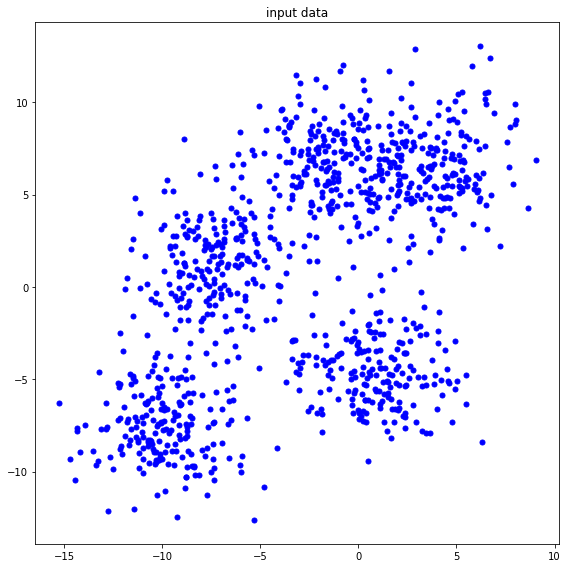

In [15]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [27]:
f = np.array([[3,4],[1,2]])
c= np.array([5,6])
dis = (f-c) **2

print(dis)
print(np.sqrt(dis[: ,0] + dis[: ,1]))


[[ 4  4]
 [16 16]]
[2.82842712 5.65685425]


In [125]:
def compute_distance(feature, center):
    distance =(feature - center) ** 2
    distance = distance[:, 0] + distance[:, 1]
    #print(distance.shape)
    #distance = np.sqrt(distance[:, 0] + distance[:, 1])
    return distance 
#compute_distance(feature, [1,2])

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [131]:
def compute_centroid(feature, label_feature, value_label, before_centroid):
    centroid = before_centroid
    cluster_k = np.where(label_feature == value_label)
 
    cluster_k_feature = feature[cluster_k]
    #print(cluster_k_feature)

    print(len(cluster_k_feature))
    if len(cluster_k_feature) !=0:
        centroid = cluster_k_feature.sum(axis=0) / len(cluster_k_feature)
    return centroid
    
#compute_centroid(np.array([[1,2],[3,4], [4,5]]), np.array([1,2,2]), 2)

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [127]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis=1)
    #print(index_label_feature)
    return index_label_feature
tempd = np.array([[10,2,3],[4,5,6]])
compute_label(tempd)


array([1, 0])

In [154]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 1000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cruster = np.zeros(number_cluster)
cluster_label_for_feature = np.zeros(number_data)
for i in range(number_data):
    cluster_label_for_feature[i] = np.random.randint(number_cluster)

print(cluster_label_for_feature)

# ===================================================

[6. 4. 3. 9. 6. 3. 0. 4. 0. 4. 5. 8. 4. 0. 8. 1. 0. 5. 7. 7. 6. 2. 6. 1.
 9. 7. 9. 3. 3. 6. 1. 4. 1. 5. 0. 5. 2. 8. 6. 3. 6. 8. 8. 3. 4. 4. 5. 0.
 0. 6. 0. 9. 8. 5. 3. 0. 9. 0. 1. 8. 8. 0. 5. 3. 7. 3. 4. 1. 2. 8. 0. 8.
 6. 7. 6. 4. 2. 8. 7. 4. 2. 5. 1. 5. 8. 5. 9. 3. 0. 3. 7. 6. 2. 6. 5. 0.
 6. 3. 6. 7. 6. 5. 2. 9. 7. 1. 0. 6. 2. 6. 0. 3. 9. 1. 9. 7. 8. 1. 5. 6.
 2. 2. 0. 6. 6. 4. 5. 0. 0. 7. 0. 2. 5. 2. 7. 5. 5. 0. 9. 3. 0. 7. 2. 3.
 1. 2. 1. 7. 9. 2. 3. 4. 5. 5. 6. 6. 2. 4. 3. 3. 5. 3. 3. 0. 5. 5. 8. 6.
 3. 5. 0. 6. 8. 7. 1. 4. 8. 5. 0. 7. 3. 9. 9. 3. 4. 3. 3. 9. 3. 2. 2. 8.
 8. 4. 1. 7. 5. 2. 4. 5. 6. 4. 9. 9. 2. 0. 2. 2. 6. 4. 4. 2. 8. 3. 5. 0.
 1. 6. 7. 7. 6. 7. 4. 6. 0. 6. 7. 6. 6. 3. 5. 4. 0. 3. 5. 8. 8. 1. 0. 3.
 6. 0. 3. 2. 4. 9. 1. 8. 1. 2. 0. 3. 4. 4. 0. 3. 0. 9. 9. 2. 2. 4. 8. 0.
 9. 9. 9. 1. 2. 4. 3. 7. 9. 5. 6. 5. 5. 7. 6. 5. 5. 7. 2. 7. 9. 2. 0. 0.
 9. 2. 9. 5. 8. 7. 6. 6. 7. 9. 4. 8. 5. 8. 0. 3. 3. 0. 2. 7. 1. 8. 2. 9.
 8. 9. 0. 4. 6. 7. 9. 1. 4. 0. 9. 3. 8. 1. 5. 7. 7.

In [75]:
teet = np.array([[1,2,3],[4,5,6]])
teet[:, 1] = 10
print(teet)

[[ 1 10  3]
 [ 4 10  6]]


In [155]:

for i in range(number_iteration):

    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, cluster_label_for_feature, k, centroid[k])
        #print(centroid[k])
        distance[:,k] = compute_distance(feature, centroid[k])

    cluster_label_for_feature = compute_label(distance)
    #print(distance)
    centroid_iteration[i] = centroid
print(cluster_label_for_feature)
print(centroid)


106
91
98
103
101
92
107
95
102
105
97
244
310
0
82
6
241
1
5
14
69
152
222
8
58
31
248
21
144
47
66
146
193
27
53
33
215
50
165
52
65
149
188
44
50
35
194
64
154
57
65
143
184
62
49
37
183
78
138
61
65
140
183
71
50
37
176
87
128
63
66
137
183
75
50
37
168
98
122
64
67
134
183
84
50
34
163
102
116
67
70
133
178
91
50
36
155
111
109
67
75
132
174
97
50
35
151
116
104
66
77
133
166
99
50
40
146
120
102
67
78
136
155
100
50
48
142
122
101
68
78
142
143
99
50
59
141
117
102
69
78
146
131
99
50
71
140
114
102
69
78
147
125
100
50
76
139
114
102
69
78
149
121
100
50
78
137
114
103
70
79
151
117
95
50
82
136
113
108
69
79
152
117
98
51
81
136
112
106
68
79
152
115
100
51
83
136
113
104
67
78
151
112
104
51
85
136
113
102
68
77
149
112
106
51
85
136
113
101
70
77
149
116
110
51
81
136
113
97
70
77
149
115
108
51
81
136
114
98
71
78
148
113
104
51
82
136
113
105
70
78
148
112
99
51
83
136
113
109
71
78
148
111
96
51
84
136
113
111
72
79
148
111
97
51
84
136
113
110
71
79
148
111
97
51
84
136
1

## plot the results

In [138]:
def plot_data(feature):
    fx = feature[:,0]
    fy = feature[:,1]
    plt.figure(figsize=(8,8))
    plt.title('input data')
    plt.scatter(fx, fy, color='blue', s=25, marker='o')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

In [94]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()

In [180]:
print(centroid_iteration[1,2][0])

-9.202764896753532


In [187]:

def plot_centroid(centroid_iteration):
    # centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'

    }
    
    for i in range(centroid_iteration.shape[1]):
        label_ = r"${cluster=" + str(i) + "}$"
        plt.plot(centroid_iteration[:, i][0], centroid_iteration[:, i][1], '-', color=colordata[i], label=label_)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [156]:
def plot_cluster(feature, label_feature, label_cluster):
    fx = feature[:,0]
    fy = feature[:,1]

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'
    }

    for i in range(len(label_cluster)):
        clu_where = np.where(label_feature == i)
        plt.scatter(fx[clu_where], fy[clu_where], color=colordata[i] ,s=15)
    plt.tight_layout()

    plt.show()


***

# results

***

1. plot the input data

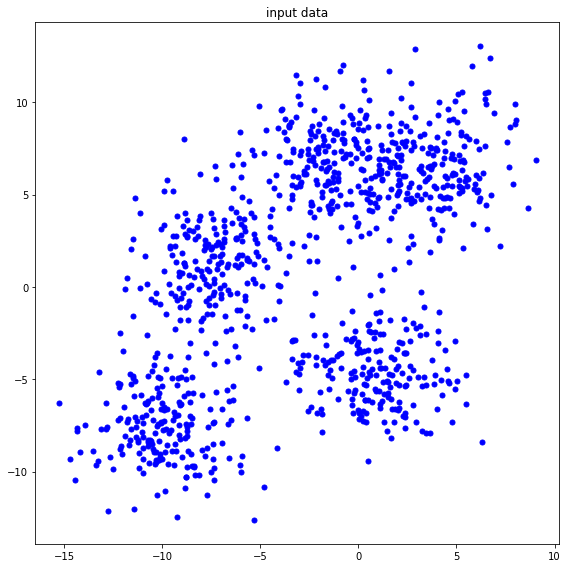

In [139]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

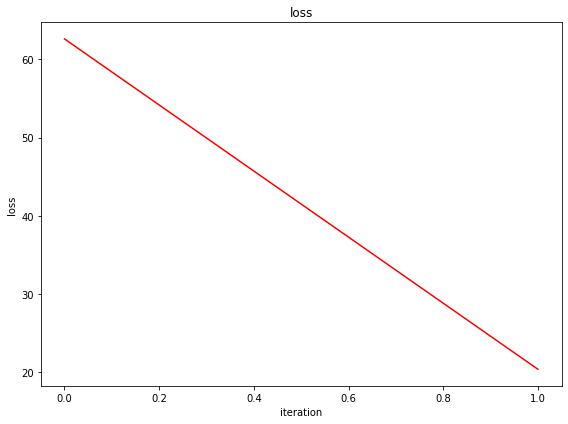

In [88]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

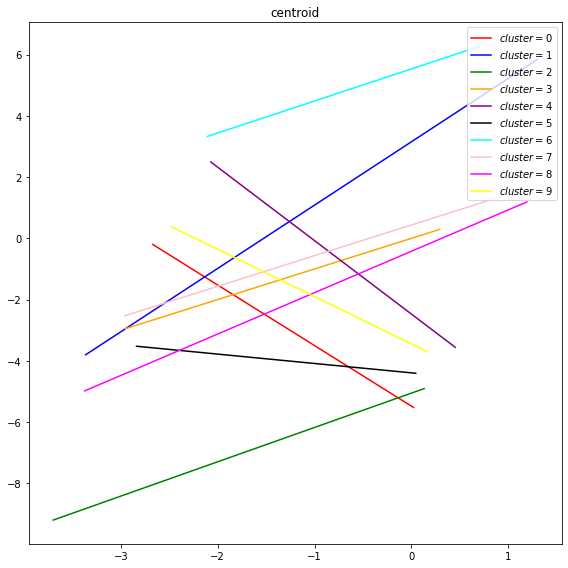

In [188]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

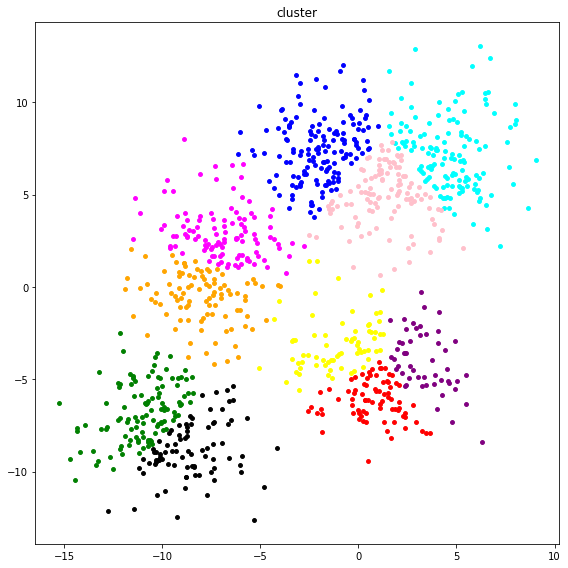

In [157]:
plot_cluster(feature, cluster_label_for_feature, label_cruster)

***

5. plot the loss over the iterations with the number of clusters being 10

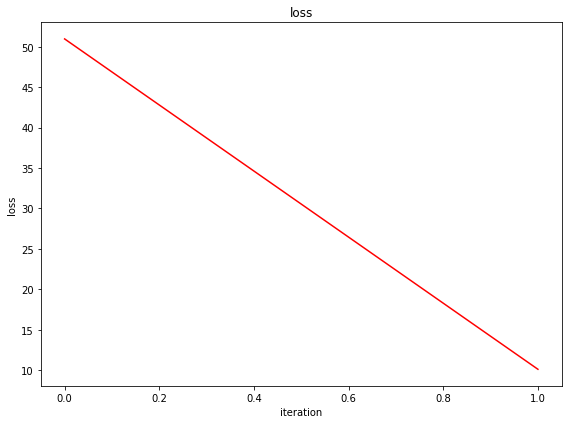

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

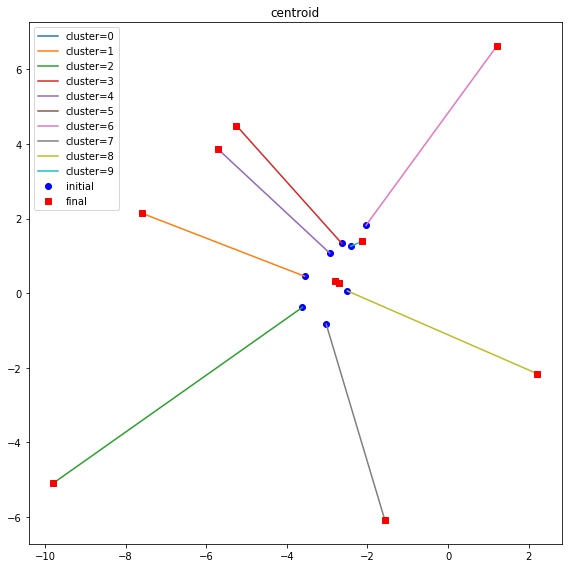

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

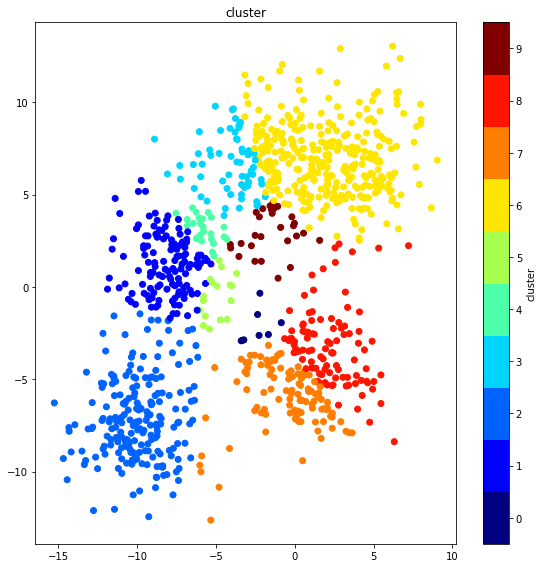

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***